# 復習から非標準ライブラリを使った例へ

## まず、補足資料を見て下記の２つの準備をすること

1. 新規Notebook「mynewnote.ipynb」を例の通り作成して、メールに添付しtakigawa@ist.hokudai.ac.jpへ送付
2. 下記の例で使用するデータ「data.csv」をダウンロードし、このnotebookと同じフォルダにコピーする

#### 補足：「Codeセル vs Markdownセル」「緑枠モード(編集モード) vs 青枠モード(コマンドモード)」

補足：Pythonのコードを入力するセル(Codeセル)と文字を入力するセル(Markdownセル)の違いが分からない人は、以前配布した資料(講義Webサイトの「jupyterの操作」)を見て復習してください。簡単なintroは以下です。

In [1]:
このセルを評価する

NameError: name 'このセルを評価する' is not defined

普通にそのまま評価すると上はエラーになりますね。上記のセルを選択し、緑枠なら「Esc」か、セル外クリックで青枠モード(コマンドモード)にしてください。青枠の状態で、上部の「Code」と書いてあるセルを「Markdown」に変更するか、「m」を押してください。その状態で「Run」(or Shift+Enter)もしくは上部バーの■クリックでセルを評価すると「文字入力のセル」としてフォーマットされ、エラーは出ません。私が作成しているjupyter notebook中の説明文のセルは全て、この「Markdown」セルなので、どのように入力すれば、どのように見えるのか、の参考にしてください。このセルをダブルクリック(あるいは青枠モードでEnter)で緑枠モードにすると「ソースコード」が見れます。

なお、formatのための特殊な書き方「例えば、**太字**」とか、箇条書き

- item1
- item2

などは以前の授業で紹介したように「Markdown」という簡易形式で書かれます。下記を参考にするか、各自ググって基本的なところくらいを調べて見てください。あるいは、practice01から05までのMarkdownセルの「ソースコード」を緑枠モードにして見てみたら、勘の良い人なら説明文を読まなくても規則がわかると思います。

https://guides.github.com/features/mastering-markdown/

以下のセルを選択し上部バーのプルダウンメニューで「Markdown」にしてから、内容を自由に書き換えて、Markdownの練習をしてみましょう。表や数式(LaTeXというルールで)も記述できるので、さらに凝りたい人は上のチュートリアルをざっとみてみてください。

# ここまでのまとめ

下記のようなことを習得してきました。

1. Pythonの構成要素 (型やデータ構造や構文など基本的構成要素と書き方のルール)
2. Pythonプログラムの構造 (関数やモジュールとして、一連の処理をまとめる)
3. Jupyter Notebookの使い方

以下ではAnacondaが内臓している拡張ライブラリを用いて、少し実践的な作業ができることを体験してみましょう！

## 外部ライブラリpandasとmatplotlibを使ってデータを分析してみよう

まず、関連ライブラリを読み込みます。なんども使うときタイプが面倒臭いので短い別名「pd」「plt」をつけておきます。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

可視化の結果をこのノートブック内に表示するため以下をしておきます。

In [2]:
%matplotlib inline

まず、前回やった形で、最初の10行を読んでみます。ただし、Windowsでは日本語が「Shift JIS」というルールで対応づけされているため、「enconding='shift_jis'」を指定しておきます。(気象庁のサイトのデータはWindowsでの使用を想定してShift JISになっています)

In [3]:
with open('data.csv', 'r', encoding='shift_jis') as f:
    for i in range(10):
        line = f.readline()
        print(line, end='')

ダウンロードした時刻：2018/06/21 03:18:39

,札幌,札幌,札幌,札幌,札幌,札幌,札幌,札幌,札幌
年月日,平均気温(℃),平均気温(℃),平均気温(℃),最高気温(℃),最高気温(℃),最高気温(℃),最低気温(℃),最低気温(℃),最低気温(℃)
,,,,,,,,,
,,品質情報,均質番号,,品質情報,均質番号,,品質情報,均質番号
2017/6/20,17.7,8,1,24.2,8,1,12.8,8,1
2017/6/21,18.9,8,1,25.8,8,1,14.1,8,1
2017/6/22,16.8,8,1,18.4,8,1,15.9,8,1
2017/6/23,16.8,8,1,20.9,8,1,14.2,8,1


元のExcelでみた形と比べてみましょう。このように「CSV」という形式は、カンマで区切られた単なるテキスト形式です。

さて、それでは同じファイルを今度はpandasという外部ライブラリ(Anacondaに付いてくる)を使って読み込んでみましょう。これはCSV形式のファイルを読んで、表形式に変換してくれます。最初の6行はスキップ、ヘッダーなしとして読み込んでみましょう。

In [4]:
mydata = pd.read_csv('data.csv', encoding='shift_jis', skiprows=6, header=None)

読み込んだ表の最初5行を表示してみます。

In [5]:
mydata.head(5)

,0,1,2,3,4,5,6,7,8,9
0,2017/6/20,17.7,8,1,24.2,8,1,12.8,8,1
1,2017/6/21,18.9,8,1,25.8,8,1,14.1,8,1
2,2017/6/22,16.8,8,1,18.4,8,1,15.9,8,1
3,2017/6/23,16.8,8,1,20.9,8,1,14.2,8,1
4,2017/6/24,17.8,8,1,21.2,8,1,14.6,8,1


読み込んだ表の行数と列数を調べます。

In [6]:
mydata.shape

(366, 10)

スライスを指定すると列が抽出できます。1から3列目を見てみましょう。

In [7]:
mydata[0:3]

,0,1,2,3,4,5,6,7,8,9
0,2017/6/20,17.7,8,1,24.2,8,1,12.8,8,1
1,2017/6/21,18.9,8,1,25.8,8,1,14.1,8,1
2,2017/6/22,16.8,8,1,18.4,8,1,15.9,8,1


あるいは最後から3行をみてみましょう。

In [8]:
mydata[-4:-1]

,0,1,2,3,4,5,6,7,8,9
362,2018/6/17,13.2,8,1,16.6,8,1,10.3,8,1
363,2018/6/18,15.4,8,1,20.2,8,1,11.4,8,1
364,2018/6/19,19.4,8,1,24.4,8,1,15.2,8,1


列が何の数字だったかわかりづらいので、最初に同じファイルの4行目を取って来ましょう。

In [9]:
header = pd.read_csv('data.csv', encoding='shift_jis', skiprows=3, header=None, nrows=1)

In [10]:
header

,0,1,2,3,4,5,6,7,8,9
0,年月日,平均気温(℃),平均気温(℃),平均気温(℃),最高気温(℃),最高気温(℃),最高気温(℃),最低気温(℃),最低気温(℃),最低気温(℃)


この1列目(スライス0:1)を先ほどの表の列名にしてみましょう。型の変換上、as_matrix()が必要ですが、最初は細かいことはあまり気にしないでください。

In [11]:
mydata.columns = list(header[0:1].as_matrix())

それでは表データ mydata の最初の10行をみてみましょう。

In [12]:
mydata.head(10)

,年月日,平均気温(℃),平均気温(℃),平均気温(℃),最高気温(℃),最高気温(℃),最高気温(℃),最低気温(℃),最低気温(℃),最低気温(℃)
0,2017/6/20,17.7,8,1,24.2,8,1,12.8,8,1
1,2017/6/21,18.9,8,1,25.8,8,1,14.1,8,1
2,2017/6/22,16.8,8,1,18.4,8,1,15.9,8,1
3,2017/6/23,16.8,8,1,20.9,8,1,14.2,8,1
4,2017/6/24,17.8,8,1,21.2,8,1,14.6,8,1
5,2017/6/25,15.3,8,1,17.8,8,1,12.0,8,1
6,2017/6/26,13.1,8,1,15.2,8,1,11.8,8,1
7,2017/6/27,15.8,8,1,22.2,8,1,11.6,8,1
8,2017/6/28,17.7,8,1,21.9,8,1,13.2,8,1
9,2017/6/29,19.9,8,1,24.8,8,1,16.5,8,1


Excelの元データにあった通り、このデータの各々の気温情報には「品質情報(基本的に8)」「均質番号(基本的に1)」という余計な情報がついていますね。これを削除してみましょう。

ilocという形で「行番号(or スライス)、列番号(or スライス)」で表の一部分を取得することができます。

In [13]:
mydata.iloc[0:5, 0:4]

,年月日,平均気温(℃),平均気温(℃),平均気温(℃)
0,2017/6/20,17.7,8,1
1,2017/6/21,18.9,8,1
2,2017/6/22,16.8,8,1
3,2017/6/23,16.8,8,1
4,2017/6/24,17.8,8,1


あるいは必要なindexだけをリストにして指定することもできます。

In [14]:
mydata.iloc[[0, 1, 2, 3, 4], [0, 1, 2, 3]]

,年月日,平均気温(℃),平均気温(℃),平均気温(℃)
0,2017/6/20,17.7,8,1
1,2017/6/21,18.9,8,1
2,2017/6/22,16.8,8,1
3,2017/6/23,16.8,8,1
4,2017/6/24,17.8,8,1


必要なインデックスを確認するためにheaderをみてみましょう。[0, 1, 4, 7]の列だけを抽出すれば良さそうですね。

In [15]:
header

,0,1,2,3,4,5,6,7,8,9
0,年月日,平均気温(℃),平均気温(℃),平均気温(℃),最高気温(℃),最高気温(℃),最高気温(℃),最低気温(℃),最低気温(℃),最低気温(℃)


必要な列だけを抜き取った表データを作成し mydata2 としてみましょう。ここでは[0, 1, 4, 7]を直入力していますが、より大きなデータなら3行おきにとるなどはプログラムした方が良いでしょう。

In [16]:
[0] + [3*i + 1 for i in range(3)]

[0, 1, 4, 7]

In [17]:
mydata2 = mydata.iloc[:, [0, 1, 4, 7]]

In [18]:
mydata2.head(10)

,年月日,平均気温(℃),最高気温(℃),最低気温(℃)
0,2017/6/20,17.7,24.2,12.8
1,2017/6/21,18.9,25.8,14.1
2,2017/6/22,16.8,18.4,15.9
3,2017/6/23,16.8,20.9,14.2
4,2017/6/24,17.8,21.2,14.6
5,2017/6/25,15.3,17.8,12.0
6,2017/6/26,13.1,15.2,11.8
7,2017/6/27,15.8,22.2,11.6
8,2017/6/28,17.7,21.9,13.2
9,2017/6/29,19.9,24.8,16.5


## pandasの機能を使ってみる

pandasはこのような表データの扱いや分析をする上で非常に多数の機能を持っています。もしデータ科学やデータの統計分析に興味があれば下記の公式チュートリアル(英語)をみて探求してみてください。なお、pandasは古いversionと今のversionで記法に変更があったので書籍を参考に勉強する場合は注意してください。

https://pandas.pydata.org/pandas-docs/stable/tutorials.html

最初は上記にある「10分でpandas入門(10 Minutes to pandas)」が良いかなと思います。

https://pandas.pydata.org/pandas-docs/stable/10min.html#min

ここでは最低限の分析をしてみましょう。まずdescribeを使えば、各列のいろいろな統計値を一気にみることができます。

In [19]:
mydata2.describe()

,平均気温(℃),最高気温(℃),最低気温(℃)
count,366.000000,366.000000,366.000000
mean,9.209836,13.202186,5.586885
std,9.660784,10.598426,9.470568
min,-8.900000,-7.600000,-12.700000
25%,0.025000,3.025000,-2.975000
50%,10.000000,14.150000,6.250000
75%,17.675000,22.300000,13.775000
max,27.700000,34.900000,23.600000


countはデータが何件あるかでこの場合366件、meanは平均値、stdは標準偏差、minは最小値、maxは最大値、25%-75%は各々のパーセンタイル(分位点)になります。

準備の通りにdata.csvを作成していれば、札幌市の「最近1年間」の日別データなので、札幌市の最近１年間の「日平均気温の平均」は9.209836度(やっぱり寒めですね！)だということがわかります。また最低の日平均気温は-8.9度、最低の日最低気温は-12.7度だったということもわかりますね！

なお、日本語を入力するのは大変なので上記を表の列名からコピペの方が良いと思いますが、pandasでは列の情報は「列名」で抽出できます。ここでは「年月日」の最初と最後を見てみましょう。headに何も数字を入れなければ、最初5行が表示されます。同様にtailは最後5行が表示されます。

In [20]:
mydata2['年月日'].head()

,年月日
0,2017/6/20
1,2017/6/21
2,2017/6/22
3,2017/6/23
4,2017/6/24


In [21]:
mydata2['年月日'].tail()

,年月日
361,2018/6/16
362,2018/6/17
363,2018/6/18
364,2018/6/19
365,2018/6/20


## 外部ライブラリmatplotlibを使って可視化してみましょう。

データ分析には視覚化(visualization)が欠かせません。Excelでもグラフはかけますが、せっかくpythonに読み込んだのなら、pythonで可視化してみましょう。このために必須なのがmatplotlibというライブラリ(Anacondaについてくる)です。

matplotlibも非常に多機能なライブラリなので、ここでは少し触れる程度ですが、興味がある人はやはり公式チュートリアルが良いでしょう。

https://matplotlib.org/tutorials/introductory/pyplot.html

また、matplotlibを使って作成できるグラフィクスの事例集が公式サイトにあるので、それを少しみてみるのが良いと思います。各々の例にはその図を出すためのpythonコードもついています。

https://matplotlib.org/gallery/index.html

In [22]:
mydata2['年月日'].head()

,年月日
0,2017/6/20
1,2017/6/21
2,2017/6/22
3,2017/6/23
4,2017/6/24


**加筆** このデータを1次元的な系列として取り出すためにはまずsqueeze()を使う。

In [23]:
mydata2['年月日'].squeeze().head()

0    2017/6/20
1    2017/6/21
2    2017/6/22
3    2017/6/23
4    2017/6/24
Name: (年月日,), dtype: object

前者はDataFrame、後者はSeriesというデータ型になる。

In [24]:
type(mydata2['年月日']), type(mydata2['年月日'].squeeze())

(pandas.core.frame.DataFrame, pandas.core.series.Series)

さて、プロットするための準備として、年月日の文字列データをまず t として時間として変換しておきます。(あまり気にしなくてOK)

In [25]:
t = pd.to_datetime(mydata2['年月日'].squeeze())

tをx軸にして、平均気温をy軸にしてプロットしてみましょう。一年の日別の平均気温の変化が見れますね！

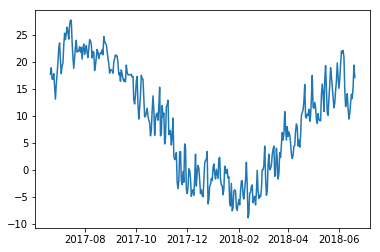

In [26]:
plt.plot(t, mydata2['平均気温(℃)'].squeeze())
plt.show()

最低気温を青で、最高気温を赤で、平均気温を黒でプロットし、摂氏0度の横線を点線で引いてみましょう！

In [27]:
mydata2['年月日'].squeeze().head(1)

0    2017/6/20
Name: (年月日,), dtype: object

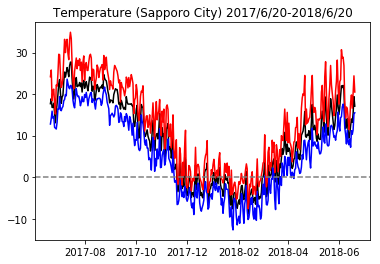

In [28]:
plt.plot(t, mydata2['平均気温(℃)'].squeeze(), color='black')
plt.plot(t, mydata2['最低気温(℃)'].squeeze(), color='blue')
plt.plot(t, mydata2['最高気温(℃)'].squeeze(), color='red')
plt.axhline(y=0, color='gray', linestyle='dashed')

s_day = mydata2['年月日'].squeeze().iloc[0]
e_day = mydata2['年月日'].squeeze().iloc[-1]
zu_title = 'Temperature (Sapporo City) {}-{}'.format(s_day, e_day)
plt.title(zu_title)

plt.show()

今度はファイル(画像ファイル形式PNG)で保存してみましょう。実際に、mygraph.pngという画像ファイルが現在のフォルダに作られていることを確認してくださいね。この形式を「plt.savefig('mygraph.pdf')」とするとPDF形式にしたりもできます。

ちょっと色やラベルやタイトルも足してfancyにした例を最後に示します。

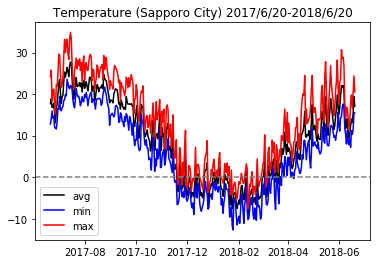

In [29]:
# データのプロット
p1, = plt.plot(t, mydata2['平均気温(℃)'].squeeze(), color='black', label='avg')
p2, = plt.plot(t, mydata2['最低気温(℃)'].squeeze(), color='blue', label='min')
p3, = plt.plot(t, mydata2['最高気温(℃)'].squeeze(), color='red', label='max')

# y=0の横線
plt.axhline(y=0, color='gray', linestyle='dashed')

# 図のタイトル (printではダメでformatが活躍ですね！)
s_day = mydata2['年月日'].squeeze().iloc[0]
e_day = mydata2['年月日'].squeeze().iloc[-1]
zu_title = 'Temperature (Sapporo City) {}-{}'.format(s_day, e_day)
plt.title(zu_title)

# 凡例
plt.legend(handles=[p1, p2, p3])

# ファイル保存
plt.savefig('mygraph.png', dpi=200)

なお、日本語を表示することもできるのですが、フォントの設定が必要なのでここではラベルやタイトルはアルファベットで入力してください。自分のPCなどで実行している場合は下記などを参考に設定してみると良いでしょう。

- http://paper.hatenadiary.jp/entry/2016/11/06/222223#利用できるフォントを探す
- https://qiita.com/yniji/items/3fac25c2ffa316990d0c

### ライブラリとドキュメントとソースコード

実践的なPythonプログラムを作成するためには、pandasやmatplotlibのように既に出来上がった良いライブラリをうまく活用していくことが可能です。

pandasやmatplotlibでどのようなことができるのかを知ることは、Python自体の習熟とはまた別の問題です。それはPythonの文法や規則とは独立に、このライブラリを作った人が勝手に決めた(設計した)ことです。あなた自身が作成したモジュールなら、どんな関数があるか、各々の関数がどのような機能でどのような呼び出し方をするのか、はあなた自身が勝手に決められます。ただし、あまり非直感的に作成すると他の人が使いづらいですし、どんな機能があるのか、各々の機能をどのように使うのかのドキュメントがないと、ライブラリの設計者以外、誰も使えないものになってしまいます。

そのため、Pythonにはdocstringといって関数を定義するときに、三重引用符でコメントを入れておけば、機能一覧や呼び出し方(一般に、API(Application Programming Interface)と言います)のドキュメントを作る機能もあります。例えば、pandasやmatplotlibの場合、下記です。

- pandas https://pandas.pydata.org/pandas-docs/stable/api.html
- matplotlib https://matplotlib.org/api/index.html

よく使われているライブラリにはほぼこのAPIのドキュメントが用意されていて、それが最も正確な情報なので、より知りたいときは常に公式のAPIを調べるようにすると良いでしょう。

また、pythonの拡張ライブラリを一部の商用のものをのぞいて、ほぼソースコードが公開されています。つまり、pandasやmatplotlibがどのようにプログラミングされているか誰でも確認することができるのです。プログラミングの世界は、このように「オープンソース」(ソースコードを公開する)文化があるので、プログラミングに長けた先人が書いたコードを読むのが一番のプログラミングの達人への近道かもしれません。そして、そこに分からないことが出てきたら、その都度、それを調べて、理解して、自分の道具や知識を増やして行きましょう。

pandasのソースコードは下記で見れます。

https://github.com/pandas-dev/pandas

例えば、表データの計算で用いた「describe」という関数は pandas/pandas/core/generic.py で定義されています。

https://github.com/pandas-dev/pandas/blob/master/pandas/core/generic.py

def行の下の長い「三重引用符で囲まれた部分」はドキュメンテーション用の情報で無視してください。別プログラムで処理するとAPIドキュメントが生成されます。

逆に、APIの方からソースコードを辿ることもできます。(こちらの方が多いかもしれません)例えば、表データ(型はpandas.DataFrame型)のdescribe関数(正確にはpandas.DataFrameクラスのdescribeメソッドですがこの講義では関数として理解しておいてください)は下記に説明が書いてあります。

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe

関数名のところの右端に「source」というリンクがあるのでクリックして見ましょう。先ほどのソースコードのリンクへ飛び、該当部分がハイライトされた状態で見ることができます。今見てもまだ分からないと思いますが、if文やdef文などが並んでいる感じですね。多分、分からないところはpandasの他機能か、講義でやらないところ(クラスやエラー処理など)だと思います。

なお、matplotlibは下記でソースコードが見れます。

https://github.com/matplotlib/matplotlib

こちらは効率化のためC言語などで書かれている部分もあるのでさらにややこしいですが、より高度な機能なライブラリを将来作成しようとする人は勉強になるでしょう！！